# Simple feed-forward neural network classification of diabetes data with Keras and Tensorflow

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load PIMA indians diabetes dataset
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.tail()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
diabetes.min()

1. Number of times pregnant                                                     0.000
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test     0.000
3. Diastolic blood pressure (mm Hg)                                             0.000
4. Triceps skin fold thickness (mm)                                             0.000
5. 2-Hour serum insulin (mu U/ml)                                               0.000
6. Body mass index (weight in kg/(height in m)^2)                               0.000
7. Diabetes pedigree function                                                   0.078
8. Age (years)                                                                 21.000
9. Class variable (0 or 1)                                                      0.000
dtype: float64

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
1. Number of times pregnant                                                    768 non-null int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test    768 non-null int64
3. Diastolic blood pressure (mm Hg)                                            768 non-null int64
4. Triceps skin fold thickness (mm)                                            768 non-null int64
5. 2-Hour serum insulin (mu U/ml)                                              768 non-null int64
6. Body mass index (weight in kg/(height in m)^2)                              768 non-null float64
7. Diabetes pedigree function                                                  768 non-null float64
8. Age (years)                                                                 768 non-null int64
9. Class variable (0 or 1)                                                     768 non-null int64
dtypes: fl

In [10]:
diabetes.describe()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes

In [11]:
# rename columns to short forms
diabetes.columns = [
    "NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]

In [12]:
# get number of values with 0 value
diabetes.isin([0]).sum()

NumTimesPrg      111
PlGlcConc          5
BloodP            35
SkinThick        227
TwoHourSerIns    374
BMI               11
DiPedFunc          0
Age                0
HasDiabetes      500
dtype: int64

In [13]:
# get number of values with missing value
diabetes.isna().sum()

NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

In [14]:
# replace 0 values with mean of the whole column
for col in ['PlGlcConc', 'BloodP', 'SkinThick', 'TwoHourSerIns', 'BMI']:
    median_val = diabetes[col].mean()
    diabetes[col] = diabetes[col].replace(to_replace=0, value=median_val)

In [15]:
diabetes

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7528424A8>,
      dtype=object)

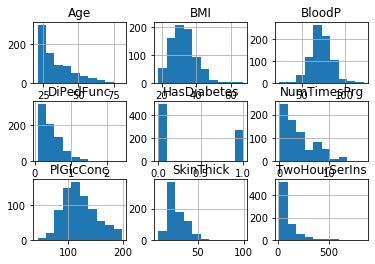

In [16]:
diabetes.hist()

In [17]:
# show correlations
corr = diabetes.corr()
corr

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
PlGlcConc,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodP,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThick,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
TwoHourSerIns,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiPedFunc,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


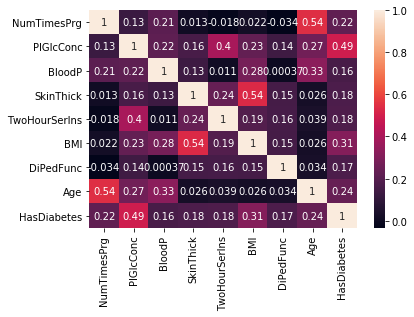

In [18]:
import seaborn as sns
sns.heatmap(corr, annot = True)

In [19]:
# split to train/test datasets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(diabetes, test_size=0.01, random_state=42)

In [20]:
train_set

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
568,4,154.0,72.000000,29.000000,126.000000,31.3,0.338,37,0
148,5,147.0,78.000000,20.536458,79.799479,33.7,0.218,65,0
667,10,111.0,70.000000,27.000000,79.799479,27.5,0.141,40,1
212,7,179.0,95.000000,31.000000,79.799479,34.2,0.164,60,0
199,4,148.0,60.000000,27.000000,318.000000,30.9,0.150,29,1
...,...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.000000,140.000000,28.6,0.411,26,0
106,1,96.0,122.000000,20.536458,79.799479,22.4,0.207,27,0
270,10,101.0,86.000000,37.000000,79.799479,45.6,1.136,38,1
435,0,141.0,69.105469,20.536458,79.799479,42.4,0.205,29,1


In [21]:
train_set.shape

(760, 9)

In [22]:
test_set.shape

(8, 9)

In [23]:
# split dataset to inputs/labels
train_set_labels = train_set["HasDiabetes"].copy()
train_set = train_set.drop("HasDiabetes", axis=1)
test_set_labels = test_set["HasDiabetes"].copy()
test_set = test_set.drop("HasDiabetes", axis=1)

In [24]:
# learn scaling from train dataset
from sklearn.preprocessing import MinMaxScaler as Scaler
scaler = Scaler()
scaler.fit(train_set)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [26]:
X_train = train_set_scaled
X_test = test_set_scaled

y_train = np.asarray(train_set_labels)
y_test = np.asarray(test_set_labels)

In [27]:
# Create NN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define a sequential model
model = Sequential()

# add hidden of fully connected layer
model.add(Dense(64, activation='relu', input_dim=8))
# add hidden of fully connected layer
model.add(Dense(64, activation='relu'))
# add output layer, try different activation for the classification layer, like softmax
model.add(Dense(1, activation='sigmoid'))

In [28]:
# build model
model.compile(optimizer="adam",
             loss='binary_crossentropy',
             metrics=['binary_accuracy'])

In [ ]:
#Plot the NN if Graphiz lib is available only
#from keras.utils import plot_model
#plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

In [34]:
# try at least 1000 epochs
hist = model.fit(X_train,
          y_train,
          epochs=10,
          verbose=1,
          batch_size=32,
          validation_data=(X_test,y_test)
)

Train on 760 samples, validate on 8 samples
Epoch 1/10
760/760 [==============================] - 0s 91us/sample - loss: 0.0785 - binary_accuracy: 0.9803 - val_loss: 1.0066 - val_binary_accuracy: 0.7500
Epoch 2/10
760/760 [==============================] - 0s 110us/sample - loss: 0.0778 - binary_accuracy: 0.9842 - val_loss: 0.6717 - val_binary_accuracy: 0.7500
Epoch 3/10
760/760 [==============================] - 0s 84us/sample - loss: 0.0807 - binary_accuracy: 0.9803 - val_loss: 1.0079 - val_binary_accuracy: 0.7500
Epoch 4/10
760/760 [==============================] - 0s 91us/sample - loss: 0.1045 - binary_accuracy: 0.9618 - val_loss: 1.4273 - val_binary_accuracy: 0.6250
Epoch 5/10
760/760 [==============================] - 0s 62us/sample - loss: 0.0914 - binary_accuracy: 0.9684 - val_loss: 0.6581 - val_binary_accuracy: 0.7500
Epoch 6/10
760/760 [==============================] - 0s 91us/sample - loss: 0.0858 - binary_accuracy: 0.9789 - val_loss: 0.6349 - val_binary_accuracy: 0.7500
E

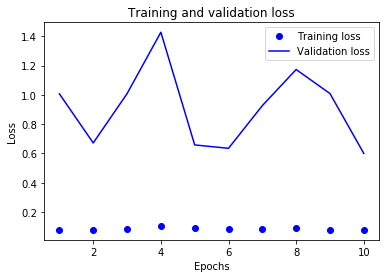

In [35]:
history_dict = hist.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
res = model.predict(X_test)
res

array([[5.9490234e-02],
       [3.4084141e-02],
       [3.4289598e-02],
       [1.0916442e-02],
       [9.3056822e-01],
       [8.6361980e-01],
       [0.0000000e+00],
       [3.7860870e-04]], dtype=float32)

In [38]:
# Make prediction for custom data

# 1. Number of times pregnant (max=17)
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test (max=199)
# 3. Diastolic blood pressure (mm Hg) (max=122)
# 4. Triceps skin fold thickness (mm) (max=99)
# 5. 2-Hour serum insulin (mu U/ml) (max=846)
# 6. Body mass index (weight in kg/(height in m)^2) (max=67)
# 7. Diabetes pedigree function (max=2.42)
# 8. Age (years) (max=81)

single_pacient_data = pd.DataFrame([[0, 166, 86, 35, 0, 43.6, 0.627, 65]])
# scale input data
single_pacient_data_scaled = scaler.transform(single_pacient_data)
X_test_single = np.asarray(single_pacient_data_scaled)

result = model.predict(X_test_single)
print("predicted: ", result)

result = model.predict_classes(X_test_single)
print("predicted class: ", result)

predicted:  [[0.00050973]]
predicted class:  [[0]]


In [39]:
# see which we predicted correctly and which not
predicted_classes = model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

48  classified correctly
16  classified incorrectly
